In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import pycountry_convert as pc

# 1. Alcohol consumption across the world today

In [2]:
alcohol_consumption = pd.read_csv('data_for_alcohol_project/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv')

In [3]:
alcohol_consumption.columns = ['Country', 'Code', 'Year', 'Total alcohol consumption per capita']
alcohol_consumption.drop(columns=['Code'], inplace=True)

**Thêm cột châu lục cho mỗi quốc gia vào dataframe**

In [4]:
continent_list = []

for country_name in alcohol_consumption['Country']:
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
    except:
#         print(country_name)
        continent_name = 'Other'
    
    continent_list.append(str(continent_name))
    
alcohol_consumption.insert(1, "Continent", continent_list, True)

alcohol_consumption['Continent'] = alcohol_consumption['Continent'].replace(['AF', 'AS', 'EU', 'NA', 'OC']
                                    , ['Africa', 'Asia', 'Europe', 'North American', 'Oceania'])

In [5]:
alcohol_consumption

,Country,Continent,Year,Total alcohol consumption per capita
0,Afghanistan,Asia,2010,0.21
1,Afghanistan,Asia,2015,0.21
2,Afghanistan,Asia,2018,0.21
3,Albania,Europe,2000,6.57
4,Albania,Europe,2005,7.65
...,...,...,...,...
994,Zimbabwe,Africa,2000,2.46
995,Zimbabwe,Africa,2005,2.77
996,Zimbabwe,Africa,2010,3.93
997,Zimbabwe,Africa,2015,4.92


**Trung bình của một người trên thế giới tiêu thụ lượng cồn trong năm là khoảng 6,1 lít từ các loại thức uống có cồn.**

In [6]:
year_consumption = alcohol_consumption.groupby(['Year']).mean()
year_consumption

,Total alcohol consumption per capita
Year,
2000,6.068073
2005,6.125771
2010,6.181712
2015,6.110462
2018,6.032528


In [7]:
year_consumption.mean()

Total alcohol consumption per capita    6.103709
dtype: float64

# Bar chart và Box plot về lượng cồn trung bình một người tiêu thụ trong năm ở các châu lục khác nhau.

In [8]:
continent_consumption = alcohol_consumption.groupby(['Continent']).mean().drop(columns=['Year'])

In [9]:
continent_consumption.head()

,Total alcohol consumption per capita
Continent,
Africa,4.687571
Asia,3.511737
Europe,11.408163
North American,6.452566
Oceania,3.865818


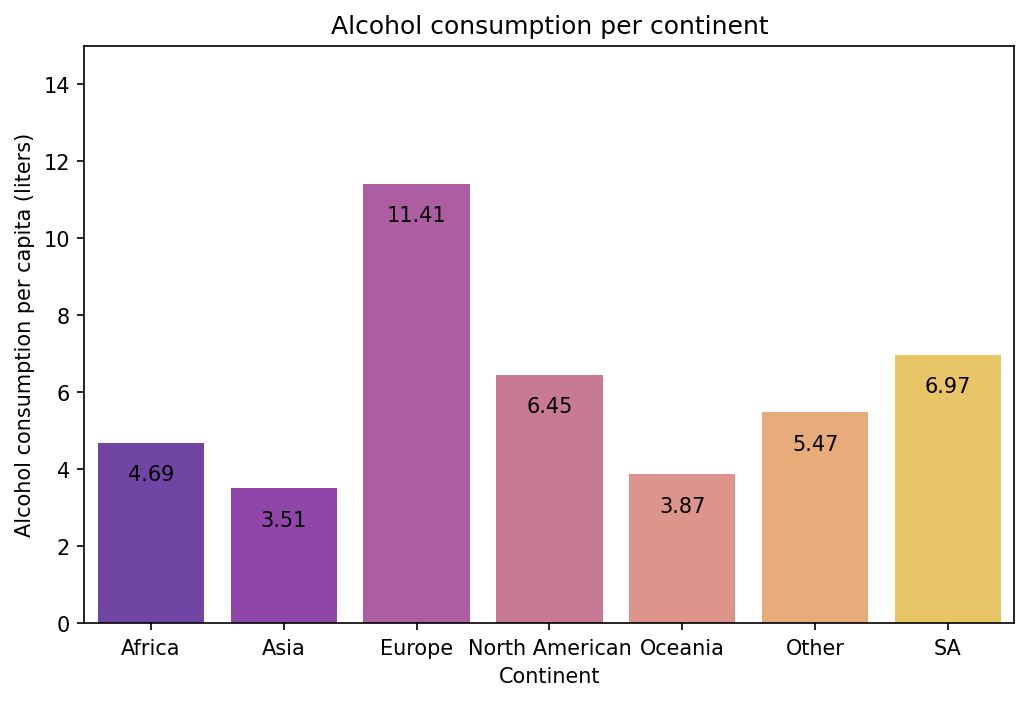

In [10]:
plt.figure(figsize=(8,5), dpi=150)

new_continent_consumption = np.round(continent_consumption['Total alcohol consumption per capita'],2)

ax =sns.barplot(data=continent_consumption, x=continent_consumption.index
            , y=new_continent_consumption, palette='plasma', alpha=0.8)

ax.bar_label(ax.containers[0], padding =-20)

plt.ylim(0,15)
plt.title("Alcohol consumption per continent")
plt.ylabel("Alcohol consumption per capita (liters)")

# plt.savefig('Bar chart of Alcohol consumption per continent.jpg')

plt.show()

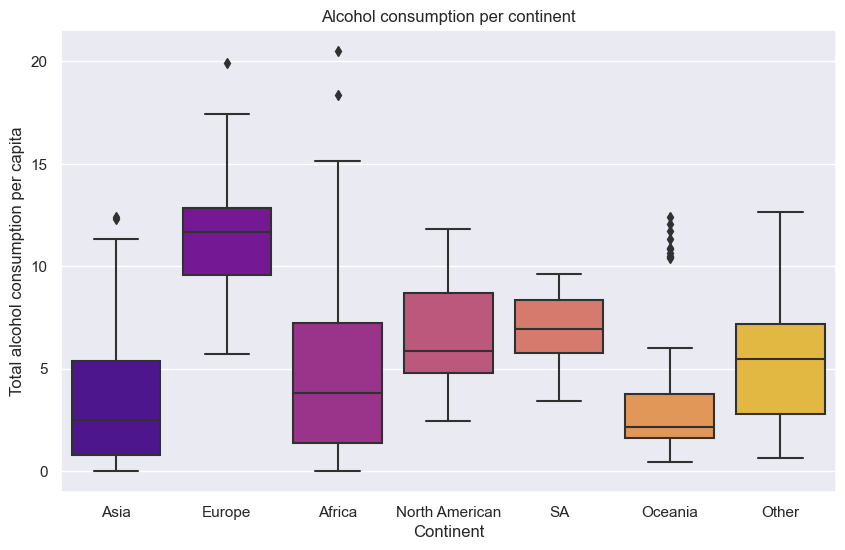

In [11]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.boxplot(data=alcohol_consumption, x='Continent', y='Total alcohol consumption per capita', palette='plasma')

# plt.ylim(0,15)
plt.title("Alcohol consumption per continent")
plt.ylabel("Total alcohol consumption per capita")

# plt.savefig('Box plot of Alcohol consumption per continent.jpg')
plt.show()


# Top 10 nước tiêu thụ nhiều nhất

In [12]:
country_consumption = alcohol_consumption.groupby(['Country']).mean().drop(columns='Year')

In [13]:
country_consumption.sort_values('Total alcohol consumption per capita',ascending=False).head(10)

,Total alcohol consumption per capita
Country,
Lithuania,14.662
Moldova,14.536
Russia,14.524
Czechia,14.504
Belarus,14.270
Romania,14.128
Uganda,14.052
Luxembourg,13.400
Ireland,13.350


# 2. Alcohol consumption versus gdp per capita

**Rượu bia và các loại đồ uống có cồn được sản xuất từ lâu đời và được tiêu thụ nhiều ở các quốc gia có mức sống cao, điều này có thể hiểu được khi nhu cầu về vui chơi giải trí, tiệc tùng, xã giao ở các quốc gia này cao hơn. Nhưng liệu mức thu nhập, mức sống của quốc gia là yếu tố chính tác động đến lượng tiêu thụ rượu bia ở quốc gia đó.**

In [14]:
consumption_vs_gdp = pd.read_csv('data_for_alcohol_project/alcohol-consumption-vs-gdp-per-capita.csv')
consumption_vs_gdp.head(5)

,Entity,Code,Year,"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)","GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2010,0.21,1957.029053,28189672.0,NaN
2,Afghanistan,AFG,2015,0.21,2068.265869,33753500.0,Asia
3,Afghanistan,AFG,2018,0.21,2033.804443,36686788.0,NaN
4,Afghanistan,AFG,2002,NaN,1189.784668,21000258.0,NaN


In [15]:
consumption_vs_gdp.columns = ['Country', 'Code', 'Year', 'Total alcohol consumption per capita', 'GDP per capita, PPP', 'Population', 'Continent']

consumption_vs_gdp = consumption_vs_gdp[consumption_vs_gdp["Total alcohol consumption per capita"].notnull() 
                                        & consumption_vs_gdp["GDP per capita, PPP"].notnull() 
                                        & consumption_vs_gdp["Continent"].notnull()]

In [16]:
consumption_vs_gdp.head(10)

,Country,Code,Year,Total alcohol consumption per capita,"GDP per capita, PPP",Population,Continent
2,Afghanistan,AFG,2015,0.21,2068.265869,33753500.0,Asia
595,Albania,ALB,2015,6.74,11878.454102,2882482.0,Europe
854,Algeria,DZA,2015,0.93,11696.950195,39543148.0,Africa
1486,Angola,AGO,2015,7.96,8036.411133,28127724.0,Africa
1870,Antigua and Barbuda,ATG,2015,5.89,18594.544922,89958.0,North America
2129,Argentina,ARG,2015,9.55,23933.886719,43257064.0,South America
2388,Armenia,ARM,2015,5.84,11321.333008,2878598.0,Asia
3088,Australia,AUS,2015,10.83,47569.292969,23820240.0,Oceania
3347,Austria,AUT,2015,12.07,52873.859375,8642422.0,Europe
3607,Azerbaijan,AZE,2015,4.58,14852.611328,9863485.0,Asia


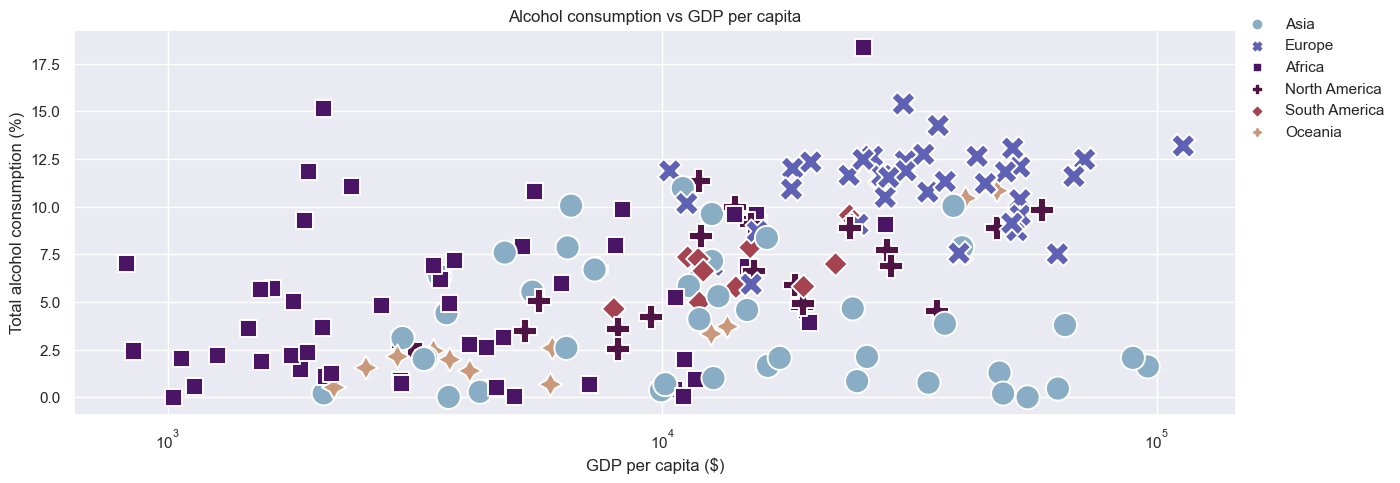

In [17]:
fig, ax = plt.subplots(figsize=(15,5), dpi=100)

sns.scatterplot(data=consumption_vs_gdp, x='GDP per capita, PPP'
                , y='Total alcohol consumption per capita'
                , hue='Continent'
                , s = 300
                , palette='twilight'
                , style = 'Continent')

plt.xscale('log') ## log-normal

plt.title("Alcohol consumption vs GDP per capita")
plt.xlabel("GDP per capita ($)")
plt.ylabel("Total alcohol consumption (%)")

plt.legend(loc=(1, 0.7),frameon=False)

# plt.savefig('Scatter plot of Alcohol consumption vs GDP per capita.jpg')

plt.show()

**Biểu đồ trên được chuyển đổi sang phân phối log chuẩn để các giá trị hiện thị chính xác hơn.**

**Từ những dữ liệu thực tế, dường như yếu tố thu nhập chưa hẳn là yếu tố chính tác động đến lượng rượu bia tiêu thụ ở mỗi quốc gia. Ở góc phía trên bên phải, có thể thấy phần lớn các quốc gia châu Âu có mức sống cao tiêu thụ nhiều rượu bia tuy nhiên nhìn xuống góc dưới bên phải một số các quốc gia châu Á cũng có mức thu nhập và mức sống cao như châu Âu (điển hình như các quốc gia Trung Đông) nhưng lại tiêu thụ rất ít rượu bia hay ngược lại cũng có nhiều quốc gia có mức thu nhập thấp nhưng lại tiêu thụ nhiều bia rượu. Có thể thấy rằng, bên cạnh yếu tố thu nhập, mức sống ở mỗi quốc gia thì còn có nhiều yếu tố khác tác động lớn hơn như nhóm tuổi chính ở quốc gia đó hay văn hóa đặc trưng, thói quen sinh hoạt của người dân quốc gia đó**

# 3.Alcohol expenditure 

**Tỷ lệ tiền chi cho alcohol / tổng tiền chi tiêu của hộ gia đình**

In [18]:
alcohol_expenditure_df = pd.read_csv('data_for_alcohol_project/alcohol-expenditure-as-share-of-total.csv')
alcohol_expenditure_df.head(3)

,Entity,Code,Year,Indicator:Alcohol expenditure as a per cent of total household expenditure
0,Albania,ALB,2007,2.1
1,Albania,ALB,2014,1.6
2,Albania,ALB,2015,1.3


In [19]:
alcohol_expenditure_df.columns = ['Country', 'Code', "Year", "Alcohol expenditure (%)"]

alcohol_expenditure_df = alcohol_expenditure_df.groupby(["Year","Country"]).mean()

alcohol_expenditure = alcohol_expenditure_df.reset_index()

In [20]:
alcohol_expenditure = pd.pivot(data=alcohol_expenditure, index='Year', columns='Country', values='Alcohol expenditure (%)').reset_index()

In [21]:
alcohol_expenditure=alcohol_expenditure[["Year",'United Kingdom', 'Russia', "United States", "Japan", "South Africa", "Azerbaijan", "Canada"]]
alcohol_expenditure.head()

Country,Year,United Kingdom,Russia,United States,Japan,South Africa,Azerbaijan,Canada
0,1990,6.5,5.0,0.9,1.2,NaN,1.3,2.3
1,1991,6.5,4.2,NaN,1.3,NaN,1.3,2.2
2,1992,6.3,4.0,NaN,1.2,7.8,1.0,2.2
3,1993,6.2,3.1,NaN,1.2,NaN,1.2,2.2
4,1994,6.2,2.9,NaN,1.1,NaN,1.1,2.2


In [22]:
year_list = list(alcohol_expenditure["Year"])

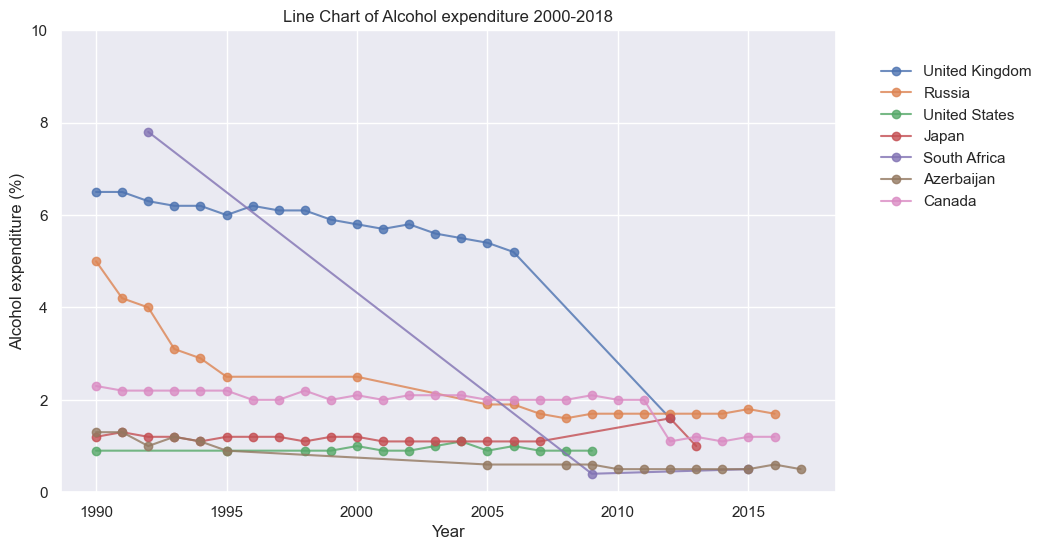

In [23]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)

xs = np.arange(1990, 2018)

for country in alcohol_expenditure.columns[1:]:
    s1mask = np.isfinite(alcohol_expenditure[country])
    
    plt.plot(xs[s1mask], alcohol_expenditure[country][s1mask], label=country
             , marker='o', markersize = 6, alpha=0.8)

plt.ylim(0,10)
plt.legend(loc=(1.05,0.6),frameon=False)
plt.title('Line Chart of Alcohol expenditure 2000-2018')
plt.xlabel("Year")
plt.ylabel("Alcohol expenditure (%)")


# plt.savefig('Line Chart of Alcohol expenditure 2000-2018.jpg')

plt.show()

**Thế giới ngày càng giảm chi tiêu cho nhu cầu uống các loại đồ uống có cồn, xu hướng này giảm mạnh ở các nước châu Âu nguyên nhân có lẽ là do chính phủ đã tăng thuế và siết chặt quản lý bia rượu để giảm các tác hại do rượu bia gây ra trong xã hội như bạo lực, tai nạn giao thông, ... Một nguyên nhân khác có thể đến từ việc người đang dần thay đổi thói quen của mình, họ cần tỉnh táo để làm việc ở những nơi như văn phòng, công sở.**

# 4. Alcohol consumption by sex

In [24]:
alcohol_consumption_by_sex = pd.read_csv("data_for_alcohol_project/males-vs-females-who-drank-alcohol-in-last-year.csv")

In [25]:
alcohol_consumption_by_sex.columns = ["Country", "Code", "Year", "Alcohol consumption of Male", "Alcohol consumption of Female", "Population", "Continent"]

alcohol_consumption_by_sex = alcohol_consumption_by_sex.groupby(["Country"]).mean()

# alcohol_consumption_by_sex

**Top 5 quốc gia có tỷ lệ nam giới có tiêu thụ rượu bia cao nhất trong năm 2016.**

In [26]:
alcohol_consumption_by_sex = alcohol_consumption_by_sex.sort_values('Alcohol consumption of Male', ascending=False)
alcohol_consumption_by_sex

,Year,Alcohol consumption of Male,Alcohol consumption of Female,Population
Country,,,,
Luxembourg,1545.100386,95.8,87.7,2.422885e+05
Switzerland,1545.100386,89.6,73.0,3.613789e+06
Ireland,1545.100386,89.5,73.1,4.253678e+06
Lithuania,1545.100386,89.1,70.9,1.918381e+06
Germany,1545.100386,88.5,70.6,4.848472e+07
...,...,...,...,...
Yemen Arab Republic,2015.000000,NaN,NaN,NaN
Yemen People's Republic,2015.000000,NaN,NaN,NaN
Yugoslavia,2015.000000,NaN,NaN,NaN


# Distribution between Men and Women

**Các biểu đồ dưới đây dựa trên khảo sát ở cả nam và nữ của mỗi quốc gia cho biết rằng người đó đã có tiêu thụ các loại đồ uống có cồn trong năm 2016 hay không (từ bộ dữ liệu của WHO)**

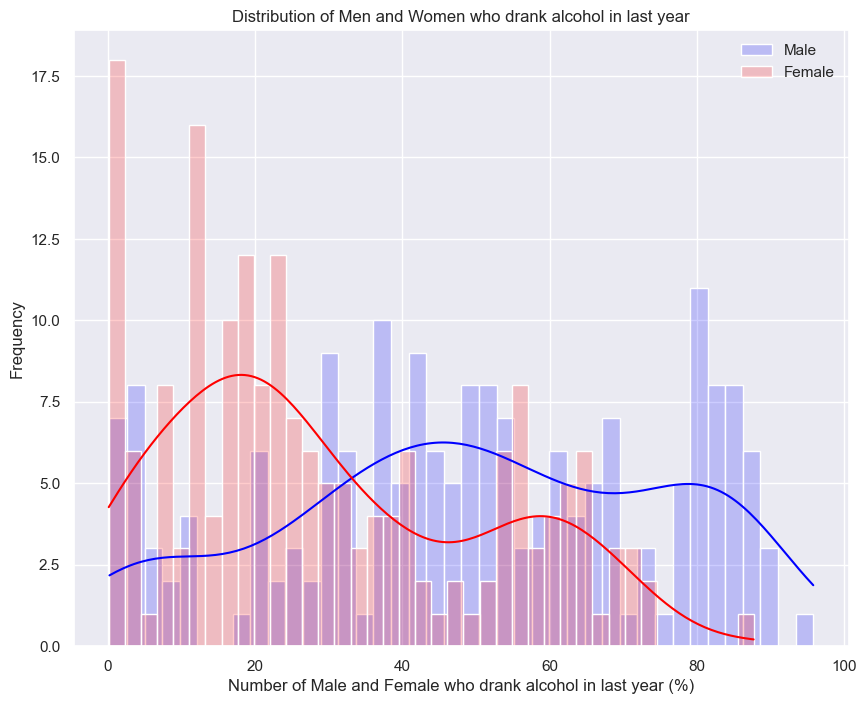

In [27]:
fig = plt.figure(figsize=(10,8), dpi=100)

sns.histplot(data=alcohol_consumption_by_sex, x='Alcohol consumption of Male', kde=True, bins=40
             , alpha=0.2, color='blue', label="Male")

sns.histplot(data=alcohol_consumption_by_sex, x='Alcohol consumption of Female', kde=True, bins=40
             , alpha=0.2, color='red', label="Female")


plt.legend(frameon=False)
plt.title('Distribution of Men and Women who drank alcohol in last year')
plt.ylabel("Frequency")
plt.xlabel("Number of Male and Female who drank alcohol in last year (%)")

# plt.savefig('Distribution between Men and Women.jpg')

plt.show()

**Phần lớn 20% nữ giới, cũng có nhiều quốc gia 60% nữ giới trên thế giới đã có tiêu thụ rượu bia trong năm 2016. Ở nam giới thường 50% đến 80% nam giới trên thế giới là có tiêu thụ rượu bia trong cùng năm.**

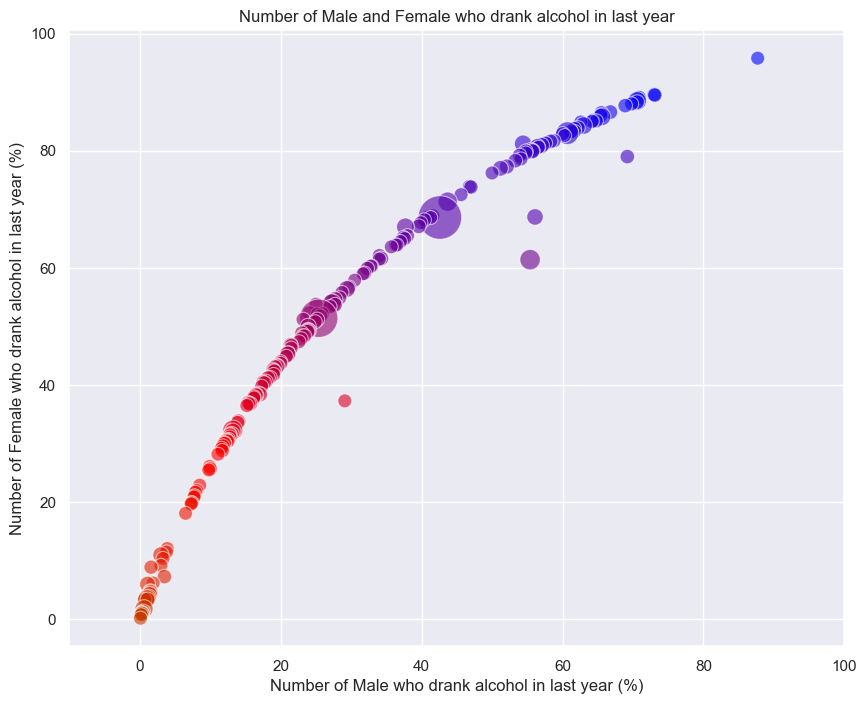

In [28]:
fig = plt.figure(figsize=(10,8), dpi=100)

sns.scatterplot(data=alcohol_consumption_by_sex, x='Alcohol consumption of Female', y='Alcohol consumption of Male'
                , hue="Country"
                , size="Population"
                , sizes=(100, 5000)
                , palette = 'brg'
                , alpha=0.6
               ,legend = False)


plt.xlim(-10,100)
plt.title('Number of Male and Female who drank alcohol in last year')
plt.xlabel("Number of Male who drank alcohol in last year (%)")
plt.ylabel("Number of Female who drank alcohol in last year (%)")

# plt.savefig('Scatter plot of Men and Women who drank alcohol in last year.jpg')

plt.show()

**Nhìn chung nam giới có xu hướng tiêu thụ rượu bia nhiều hơn nữ giới, ở các quốc gia ít tiêu thụ rượu bia (các chấm màu đỏ) thì tỷ lệ tiêu thụ rượu bia ở nam giới thậm chí còn nhiều gấp đôi nữ giới. 
Tuy nhiên ở các quốc gia ở góc trên bên phải (các chấm màu xanh) là các quốc gia người dân tiêu thụ nhiều rượu bia nhất thì giữa nam và nữ lại không khác biệt nhiều, nam giới tiêu thụ nhiều thì ở nữ giới cũng vậy.**

# 5. Beer, Wine and Spirits consumption per person

**Dưới đây là mức tiêu thụ rượu, bia và rượu mạnh của một số nước như Anh, Pháp, Nga, Mỹ, Iceland và Việt Nam từ năm 1960 đến 2020.**

**Bia chứa khoảng 5% cồn nguyên chất trên mỗi thể tích. Vì vậy mức tiêu thụ trung bình của một người là 4 lít cồn nguyên chất tương đương với 80 lít bia mỗi năm.**

In [29]:
beer_consumption = pd.read_csv('data_for_alcohol_project/beer-consumption-per-person.csv')
wine_consumption = pd.read_csv('data_for_alcohol_project/wine-consumption-per-person.csv')
spirits_consumption = pd.read_csv('data_for_alcohol_project/spirits-consumption-per-person.csv')

In [30]:
def clear_beverage_consumption(beverage_consumption, beverage_name):
    beverage_consumption.columns = ['Country', "Code", "Year", f"Alcohol consumption in {beverage_name} (%)"]
    
    beverage_consumption=beverage_consumption.groupby(["Year","Country"]).mean().reset_index()
    
    beverage_consumption = pd.pivot(data=beverage_consumption, index='Year', columns='Country'
                        , values=f"Alcohol consumption in {beverage_name} (%)").reset_index()
    
    beverage_consumption=beverage_consumption[["Germany", "Vietnam", "Russia", "France", "United States", "Iceland", "United Kingdom"]]
    
    return beverage_consumption

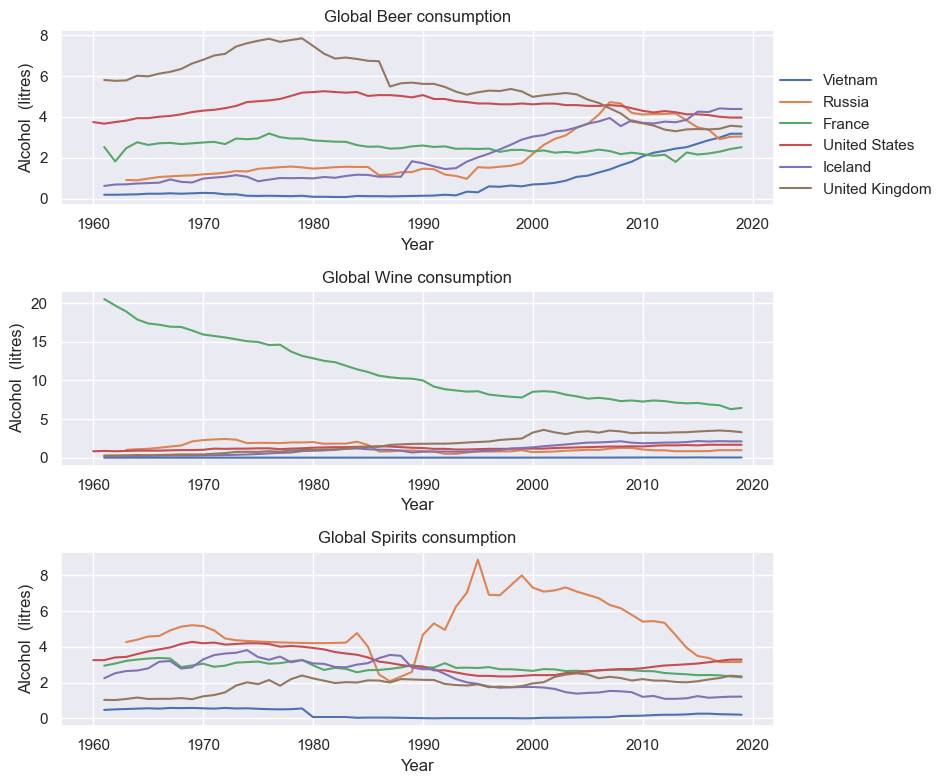

In [31]:
fig, axes = plt.subplots(figsize=(8,8), dpi=100, nrows=3, ncols=1)
xs = np.arange(1960, 2020)
    
three_beverage_name = ["Beer", "Wine", "Spirits"]
three_beverage_consumption = [beer_consumption, wine_consumption, spirits_consumption]

for i in range(len(three_beverage_consumption)):
    
    beverage_consumption = clear_beverage_consumption(three_beverage_consumption[i], three_beverage_name[i])
    
    for country in beverage_consumption.columns[1:]:
        s1mask = np.isfinite(beverage_consumption[country])
        
        axes[i].plot(xs[s1mask],beverage_consumption[country][s1mask], label=country)
        
    axes[i].set_title(f'Global {three_beverage_name[i]} consumption')
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Alcohol  (litres)")
    
    plt.tight_layout() # giữ khoảng cách giữa các hình
    
plt.legend(loc=(1.0, 3),frameon=False)

# plt.savefig('three beverage consumption.jpg')

plt.show()

**Phần lớn các quốc gia trên thế giới ngày càng giảm tiêu thụ các loại đồ uống có cồn, ở bia mỗi năm một người tiêu thụ trung bình khoảng 80 lít bia (4 lít cồn nguyên chất), ở rượu nhẹ là khoảng và rượu mạnh là khoảng 2 lít cồn nguyên chất**

**Pháp vốn là quốc gia nổi tiếng với rượu vang tuy nhiên lượng tiêu thụ rượu ở quốc gia này đang giảm rõ rệt qua các năm**

**Trong khi thế giới đang có xu hướng giảm tiêu thụ các loại đồ uống có cồn này thì đặc biệt ở Việt Nam lại tăng nhanh chóng, Việt Nam trở thành một trong những quốc gia có lượng tiêu thụ bia tăng nhanh nhất trên thế giới.**

# 6. The health impact of alcohol

**Hằng năm trên thế giới có khoảng 2.8 triệu người tử vong nguyên nhân là do rượu bia. Rượu bia trở thành 1 trong những nguy cơ hàng đầu gây chết sớm trên thế giới (đứng thứ 7 trong số các tác nhân gây chết sớm)**

**Biểu đồ dưới đây sử dụng thang đo AAF (Alcohol attributable fractions), đo lường tổng tỷ lệ tử vong do nhiều nguyên nhân khác nhau trực tiếp hoặc gián tiếp liên quan đến việc uống rượu.**

In [32]:
aaf_of_mortality = pd.read_csv('data_for_alcohol_project/alcohol-attributable-fraction-of-mortality.csv')
aaf_of_mortality.head()

,Entity,Code,Year,"Indicator:Alcohol-attributable fractions, all-cause deaths (%) - Sex:Both sexes"
0,Afghanistan,AFG,2016,0.2
1,Albania,ALB,2016,6.4
2,Algeria,DZA,2016,1.0
3,Angola,AGO,2016,6.8
4,Antigua and Barbuda,ATG,2016,4.5


In [33]:
aaf_of_mortality.columns = ['Country', 'Code', 'Year', 'Alcohol attributable fractions (%)']
aaf_of_mortality=aaf_of_mortality.groupby(['Country']).mean()

In [34]:
aaf_of_mortality=aaf_of_mortality.loc[["Germany", "Vietnam", "Russia", "France", "United States", "Iceland", "United Kingdom"]]

**Tỷ lệ tử vong do rượu bia ở Hầu hết các quốc gia trên thế giới khoảng 2% đến 10%. Tuy nhiên có nhiều quốc gia tỷ lệ này cao hơn rất nhiều trong đó một số nước ở phía Đông châu Âu tỷ lệ này có thể chiếm gần 25% tổng số ca tử vong của quốc gia.**

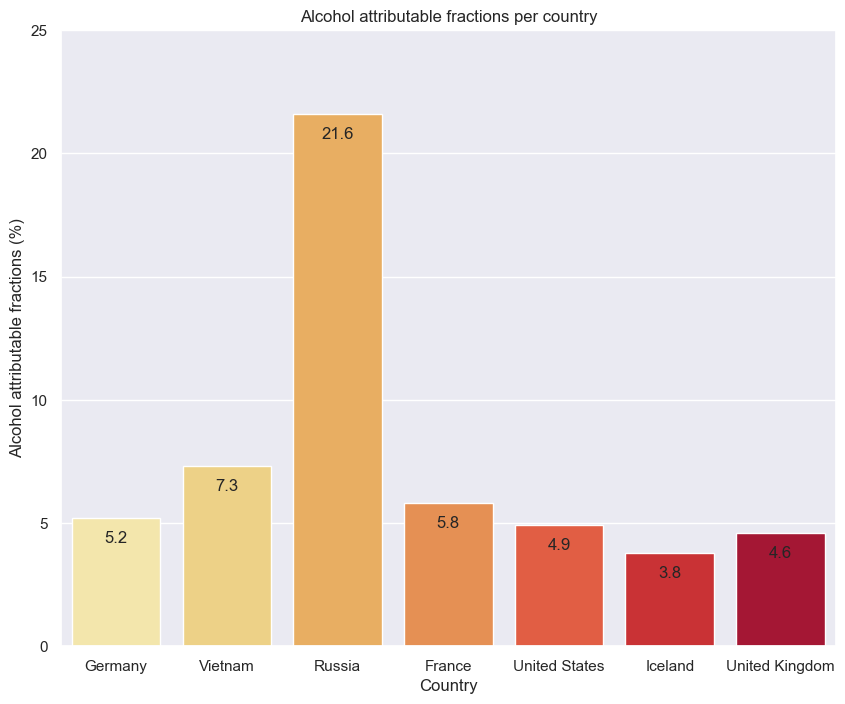

In [35]:
fig = plt.figure(figsize=(10,8), dpi=100)

ax =sns.barplot(data=aaf_of_mortality, x=aaf_of_mortality.index
            , y='Alcohol attributable fractions (%)', palette='YlOrRd')

ax.bar_label(ax.containers[0], padding =-20)

plt.ylim(0,25)
plt.title("Alcohol attributable fractions per country")
plt.ylabel("Alcohol attributable fractions (%)")

# plt.savefig('Alcohol attributable fractions (%) per country')

plt.show()

# 7. Alcohol related deaths by age

**Dữ liệu dưới đây được thu thập từ các quốc gia trên thế giới từ 1990 - 2019 cho biết tỷ lệ người tử vong do rượu bia ở các nhóm tuổi khác nhau**

In [36]:
deaths_by_age = pd.read_csv('data_for_alcohol_project/deaths-attributed-to-alcohol-use-by-age.csv')

In [37]:
deaths_by_age.columns = ['Country', 'Code', 'Year', 'Age: 70+ years', 'Age: 50-69 years', 'Age: 15-49 years', 'Age: Under 15', 'Age: Under 5']
deaths_by_age.drop(columns=['Age: Under 15', 'Age: Under 5'], inplace=True)

In [38]:
world_deaths_by_age = deaths_by_age.groupby('Year').mean().reset_index()
world_deaths_by_age = world_deaths_by_age[world_deaths_by_age['Year'] == 2019]


In [39]:
vn_deaths_by_age = deaths_by_age.groupby(['Year','Country']).mean().loc[(2019,'Vietnam')]

vn_deaths_by_age = pd.DataFrame(vn_deaths_by_age).transpose().reset_index()
vn_deaths_by_age.columns = ['Year', 'Country', 'Age: 70+ years', 'Age: 50-69 years', 'Age: 15-49 years']


In [40]:
def calculate_percentage_by_ages(deaths_by_age_df):
    deaths_by_age_df = deaths_by_age_df.set_index('Year')
    deaths_by_age_df['Total'] = deaths_by_age_df.sum(axis=1)
    deaths_by_age_df['70+ (%)'] = round((deaths_by_age_df['Age: 70+ years'] / deaths_by_age_df['Total'] * 100), 2)

    deaths_by_age_df['50-69 (%)'] = round((deaths_by_age_df['Age: 50-69 years'] / deaths_by_age_df['Total'] * 100), 2)

    deaths_by_age_df['15-49 (%)'] = round((deaths_by_age_df['Age: 15-49 years'] / deaths_by_age_df['Total'] * 100), 2)

    return deaths_by_age_df.reset_index()

# World 2019

In [41]:
world_deaths_percentage_by_age = calculate_percentage_by_ages(world_deaths_by_age)
world_deaths_percentage_by_age

,Year,Age: 70+ years,Age: 50-69 years,Age: 15-49 years,Total,70+ (%),50-69 (%),15-49 (%)
0,2019,19517.035088,27380.438596,16985.166667,63882.640351,30.55,42.86,26.59


# Viet Nam 2019

In [42]:
vn_deaths_percentage_by_age = calculate_percentage_by_ages(vn_deaths_by_age)
vn_deaths_percentage_by_age

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7192\930583002.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  deaths_by_age_df['Total'] = deaths_by_age_df.sum(axis=1)


,Year,Country,Age: 70+ years,Age: 50-69 years,Age: 15-49 years,Total,70+ (%),50-69 (%),15-49 (%)
0,2019,Vietnam,13596.0,26239.0,13076.0,52911.0,25.7,49.59,24.71


In [43]:
world_percentage_list = world_deaths_percentage_by_age.iloc[:, [5,6,7]].values.tolist()[0]

vn_percentage_list = vn_deaths_percentage_by_age.iloc[:, [6,7,8]].values.tolist()[0]

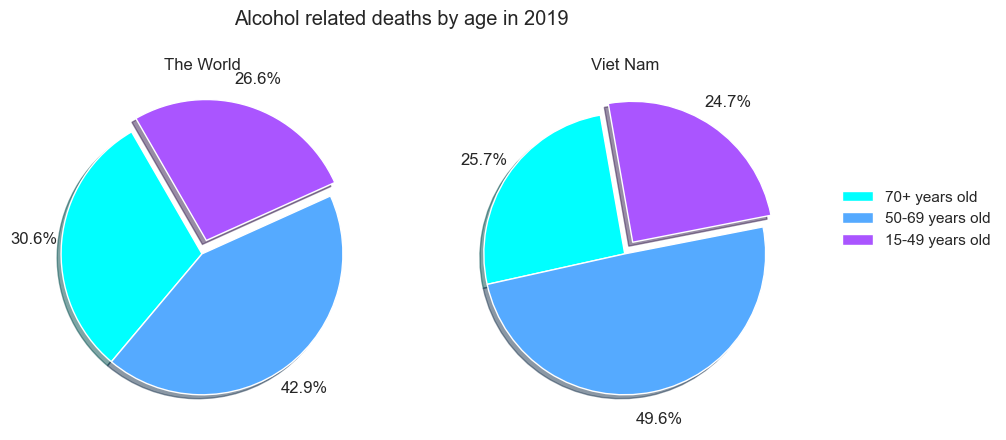

In [44]:
fig, axes = plt.subplots(figsize=(10,8), dpi=100, nrows=1, ncols=2)

explode = (0, 0, 0.1)  # only "explode" the 2nd slice
labels = ['70+ years old', '50-69 years old', '15-49 years old']

theme = plt.get_cmap('cool')
axes[0].set_prop_cycle("color", [theme(1. * i / len(explode)) for i in range(len(explode))])
axes[1].set_prop_cycle("color", [theme(1. * i / len(explode)) for i in range(len(explode))])

# PIE CHART OF THE WORLD 2019
axes[0].pie(world_percentage_list
        , explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=120 , pctdistance=1.2)


# PIE CHART OF VIET NAM 2019
axes[1].pie(vn_percentage_list
        , explode=explode, autopct='%1.1f%%'
        , shadow=True, startangle=100, pctdistance=1.2)

axes[0].set_title(f'The World')
axes[1].set_title(f'Viet Nam')

plt.suptitle("Alcohol related deaths by age in 2019", y=0.8)
plt.legend(labels, loc=(1.1, 0.5), frameon=False)

# plt.savefig("Alcohol related deaths by age in 2019")

plt.show()

## 

# Comparation of alcohol related deadths by age in high income countries and lower middle countries (1990 - 2020)

**So sánh tỷ lệ tử vong ở các nhóm tuổi giữa các quốc gia có thu nhập cao và các quốc gia có thu nhập trung bình thấp**

In [45]:
high_income_countries = deaths_by_age[deaths_by_age['Country'] == 'World Bank High Income']

lower_middle_income_countries = deaths_by_age[deaths_by_age['Country'] == 'World Bank Lower Middle Income']

# High income countries 1990 - 2019

In [46]:
high_income_countries_percentage = calculate_percentage_by_ages(high_income_countries).set_index('Year')

high_income_countries_percentage.tail()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7192\930583002.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  deaths_by_age_df['Total'] = deaths_by_age_df.sum(axis=1)


,Country,Code,Age: 70+ years,Age: 50-69 years,Age: 15-49 years,Total,70+ (%),50-69 (%),15-49 (%)
Year,,,,,,,,,
2015,World Bank High Income,NaN,224270,219973,83135,527378,42.53,41.71,15.76
2016,World Bank High Income,NaN,227165,222189,82708,532062,42.70,41.76,15.54
2017,World Bank High Income,NaN,232283,221962,81924,536169,43.32,41.40,15.28
2018,World Bank High Income,NaN,241202,222363,81421,544986,44.26,40.80,14.94
2019,World Bank High Income,NaN,251216,222786,81132,555134,45.25,40.13,14.61


# Lower middle income countries 1990 - 2019

In [47]:
lower_middle_income_countries_percentage = calculate_percentage_by_ages(lower_middle_income_countries).set_index('Year')

lower_middle_income_countries_percentage.tail(5)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7192\930583002.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  deaths_by_age_df['Total'] = deaths_by_age_df.sum(axis=1)


,Country,Code,Age: 70+ years,Age: 50-69 years,Age: 15-49 years,Total,70+ (%),50-69 (%),15-49 (%)
Year,,,,,,,,,
2015,World Bank Lower Middle Income,NaN,116305,300760,260052,677117,17.18,44.42,38.41
2016,World Bank Lower Middle Income,NaN,119755,308012,262148,689915,17.36,44.64,38.00
2017,World Bank Lower Middle Income,NaN,124445,314322,265789,704556,17.66,44.61,37.72
2018,World Bank Lower Middle Income,NaN,128548,319420,268685,716653,17.94,44.57,37.49
2019,World Bank Lower Middle Income,NaN,132035,325629,271087,728751,18.12,44.68,37.20


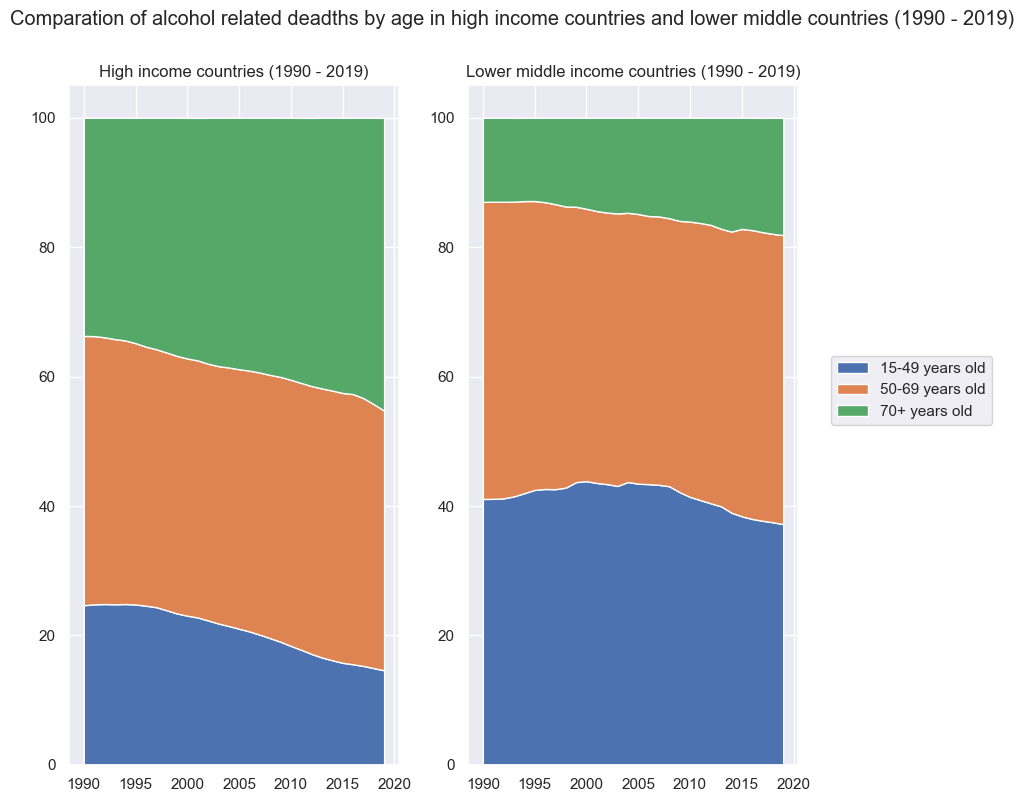

In [48]:
fig, axes = plt.subplots(figsize=(10,8), dpi=100, nrows=1, ncols=2)

axes[0].stackplot(high_income_countries_percentage.index
              , high_income_countries_percentage['15-49 (%)']
              , high_income_countries_percentage['50-69 (%)']
              , high_income_countries_percentage['70+ (%)']
              , labels=['15-49 years old', '50-69 years old', '70+ years old'])
                  

axes[0].set_title('High income countries (1990 - 2019)')


axes[1].stackplot(lower_middle_income_countries_percentage.index
              , lower_middle_income_countries_percentage['15-49 (%)']
              , lower_middle_income_countries_percentage['50-69 (%)']
              , lower_middle_income_countries_percentage['70+ (%)']
              , labels=['15-49 years old', '50-69 years old', '70+ years old'])
                  

axes[1].set_title('Lower middle income countries (1990 - 2019)')


plt.suptitle("Comparation of alcohol related deadths by age in high income countries and lower middle countries (1990 - 2019)", y=1)

plt.legend(loc=(1.1, 0.5))
plt.tight_layout()

# plt.savefig("High income and lower middle countries")

plt.show()


**Từ dữ liệu thực tế năm 1990 - 2020 cho thấy sự khác biệt rõ rệt giữa các quốc gia có thu nhập cao và các quốc gia có thu nhập trung bình thấp, tỷ lệ tử vong ở nhóm tuổi 15-49 tuổi ở các nước thu nhập trung bình thấp (khoảng 40%) cao hơn gấp đôi các nước có thu nhập cao (khoảng 20%). Ở nhóm 50-69 tuổi gần như không có sự chênh lệch quá lớn giữa 2 nhóm quốc gia (khoảng 40%)**

**Qua các năm tỷ lệ tử vong ở nhóm 15-49 tuổi ở các nước thu nhập cao giảm rõ rệt và ở các nước thu nhập trung bình thấp tỷ lệ này giảm không nhiều. Ngược lại tỷ lệ tử vong ở nhóm trên 70 tuổi ở các nước thu nhập cao tăng đáng kể còn ở các nước thu nhập trung bình thấp thì tỷ lệ này tăng không nhiều**

# 7. Alcohol related road deaths

In [49]:
road_traffic_deaths_by_alcohol = pd.read_csv('data_for_alcohol_project/road-traffic-deaths-to-alcohol.csv')

In [50]:
road_traffic_deaths_by_alcohol.columns = ['Country', 'Code', 'Year', 'Attribution of road traffic deaths to alcohol (%)']
road_traffic_deaths_by_alcohol

,Country,Code,Year,Attribution of road traffic deaths to alcohol (%)
0,Albania,ALB,2017,5.2
1,Antigua and Barbuda,ATG,2017,0.9
2,Argentina,ARG,2017,17.0
3,Armenia,ARM,2017,1.9
4,Australia,AUS,2017,17.0
...,...,...,...,...
89,United Arab Emirates,ARE,2017,1.8
90,United Kingdom,GBR,2017,36.0
91,United States,USA,2017,29.0
92,Uzbekistan,UZB,2017,3.6


**Trung bình 15,95 % tổng số ca tử vong tai nạn giao thông có liên quan đến rượu bia**

In [51]:
average_of_the_world = road_traffic_deaths_by_alcohol['Attribution of road traffic deaths to alcohol (%)'].mean()
average_of_the_world

15.958510638297872

In [52]:
road_traffic_deaths_by_alcohol['Attribution of road traffic deaths to alcohol (%)'].describe()

count     94.000000
mean      15.958511
std       17.819926
min        0.100000
25%        3.825000
50%       10.400000
75%       23.425000
max      100.000000
Name: Attribution of road traffic deaths to alcohol (%), dtype: float64

In [53]:
road_traffic_deaths_by_alcohol = road_traffic_deaths_by_alcohol.set_index('Country')

In [54]:
road_traffic_deaths_by_alcohol=road_traffic_deaths_by_alcohol.loc[["Russia", "France", "United States"
                                                                   , "Canada", "United Kingdom", "India"]]

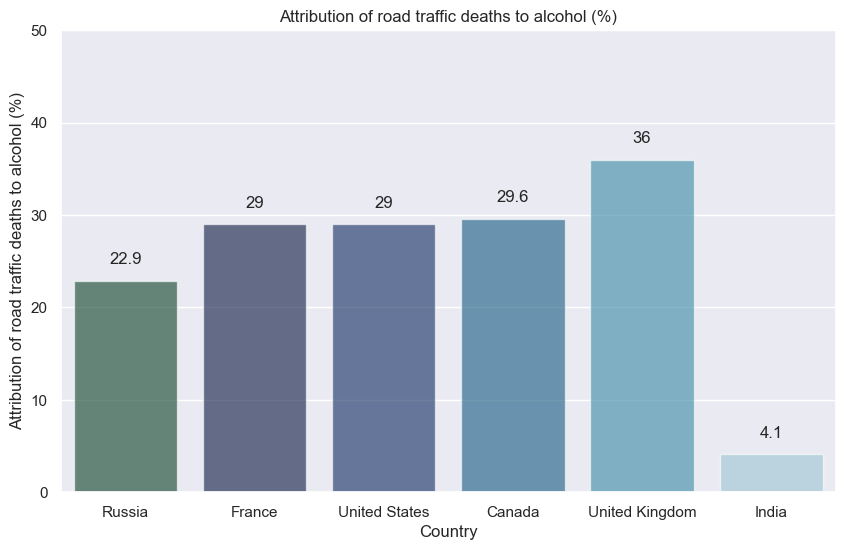

In [55]:
fig = plt.figure(figsize=(10,6), dpi=100)

ax =sns.barplot(data=road_traffic_deaths_by_alcohol, x=road_traffic_deaths_by_alcohol.index
            , y='Attribution of road traffic deaths to alcohol (%)', palette='ocean', alpha=0.6)

ax.bar_label(ax.containers[0], padding = 10)

plt.ylim(0,50)
plt.title("Attribution of road traffic deaths to alcohol (%)")
plt.ylabel("Attribution of road traffic deaths to alcohol (%)")

# plt.savefig("Attribution of road traffic deaths to alcohol (%)")

plt.show();